# Customer Segmentation by Kmeans

## Overview

Customers are important to the survival and success of any business because they are the source of the revenue. The success of a business is the ability to satisfy customers and make them happy, and therefore turn a profit from them. To achieve a business success, the business has to find the right potential customers. 
Using customers’ data can help to build models for predicting the future behaviors of the customers and targeting customers who  help the business to make more money. 

In this project, I will analyze a mall customers’ dataset to answer the following question:
* Who is the customers we should target?

To answer this question, I will build a K-means clustering model to group the customers by their characteristics. This grouping is to understand each segment and target the right customers to let them stay with the business.


### Dataset


* **Mall_Customers.csv** - The file contains information about the customers, there are five columns:
    * CustomerID: Unique ID assigned to the customer.
    * Genre: Gender of the customer.
    * Age: Age of the customer.
    * Annual_Income_(k $\$): Annual Income of the customee.
    * Spending_Score_(1-100): Score assigned by the mall based on customer behavior and spending nature.
    
This dataset is avilable in [Kaggle](https://www.kaggle.com/shwetabh123/mall-customers) website. 

The project is organized as follows. Section 1 explores and visualizes the data. Section 2 includes data preperation and Section 3 implements the solution. Finally, Section 4 presents the summary.

## 1. Data Understanding

This step explores the dataset, features, data types using different functions: `head()`, `shape`, `describe()` and checks the null values using `isnull()`. It also visualizes the data to understand it.

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
# Read data in the csv file

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check null values
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

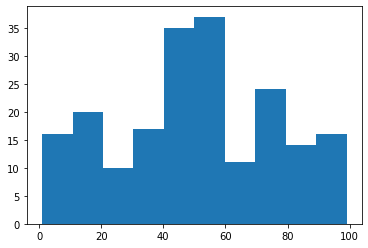

In [6]:
# Dispaly the distribution of Spending_Score in a chart
plt.hist(df['Spending_Score'])
plt.show()

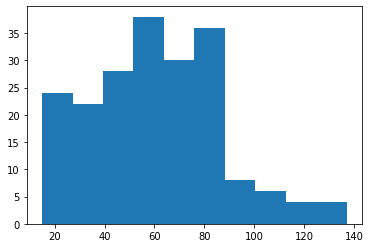

In [7]:
# Dispaly the distribution of Annual_Income_(k$) in a chart
plt.hist(df['Annual_Income_(k$)'])
plt.show()

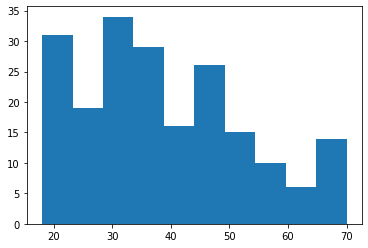

In [8]:
# Dispaly the distribution of Age in a chart
plt.hist(df['Age'])
plt.show()

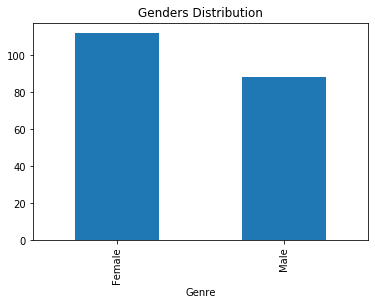

In [9]:
# Display the number of male and female in a chart

gender_df = df.groupby(['Genre']).count()['CustomerID']
gender_df.plot(kind='bar', title ='Genders Distribution');

In [10]:
# Spending_Score mean with respect to Genre
df[['Spending_Score',  'Genre']].groupby(['Genre']).mean()

,Spending_Score
Genre,
Female,51.526786
Male,48.511364


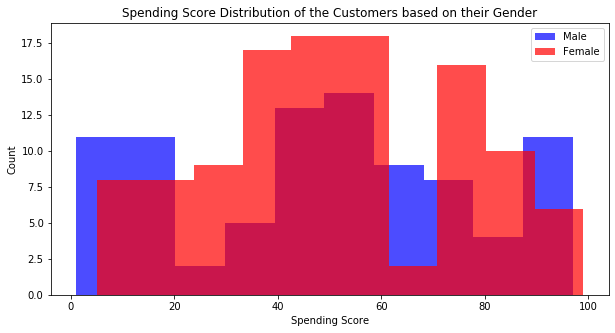

In [11]:
# Dispaly the distribution of Spending_Score based on the gender
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(df[df['Genre'] =='Male']['Spending_Score'], color = 'blue', alpha = 0.7, label = 'Male')
ax.hist(df[df['Genre'] =='Female']['Spending_Score'], color ='red', alpha = 0.7, label = 'Female')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.title('Spending Score Distribution of the Customers based on their Gender')
plt.legend()
plt.show()

In [12]:
# Spending_Score max with respect to Genre
df[['Spending_Score', 'Genre']].groupby(['Genre']).max()

,Spending_Score
Genre,
Female,99
Male,97


In [13]:
# Spending_Score min with respect to Genre
df[['Spending_Score', 'Genre']].groupby(['Genre']).min()

,Spending_Score
Genre,
Female,5
Male,1


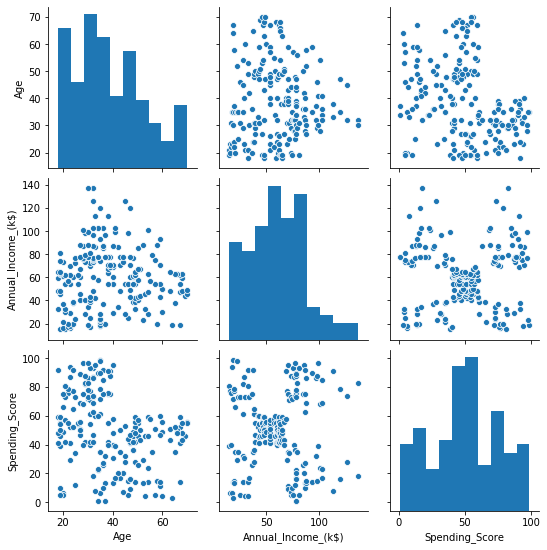

In [14]:
# Display the relationship between the features of the dataset
sns.pairplot(df[[ 'Age', 'Annual_Income_(k$)', 'Spending_Score']])

**Observations:**

From the data, we can see that:
* All the features are nemerical data unless `Genre` is categorical data. 
* The dataset has zero null values. 
* The number of the female is higher than the number of the male. 
* There are no relationship between the annual income and the spending score. 
* The average of the spending scores of females are higher than males. 
* The customers can be grouped based on the spending scores and annual incomes.


## 2. Data Preparation

This step includes selecting the appropriate data and cleaning data.

As we can see from the previous section, there is no null data. For feature selection, I will select the annual income and the spending score. 

In [15]:
X = df[['Annual_Income_(k$)', 'Spending_Score']]

## 3. Modeling

This step builds the data mining model from the dataset to answer the question, and discusses the result is done in this step.

The clustering model that will be used is the K-means model. To build the Kmeans model, the number of the optimal clusters should firstly be determined.  

### 3.1. Selecting the Right Number of Clusters using Elbow Method

In [16]:
# Average distance to the center
WSS = []
index = range(1,8)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    WSS.append(kmeans.inertia_)
    print(kmeans.inertia_)

269981.28
181363.59595959596
106348.37306211118
73679.78903948834
44448.45544793371
37265.86520484347
30241.34361793659


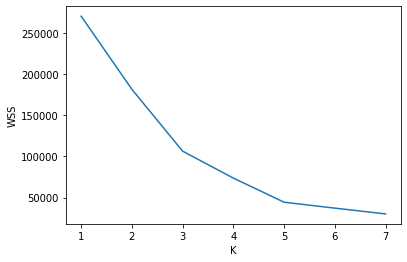

In [17]:
# Use the Elbow method to determine the optimum number of clusters
plt.plot(index, WSS)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

The chart is showed that the value of k at the "elbow" is 5. So, The number of the cluster will be 5. 

### 3.2. Building the K-means Model

In [18]:
# Create Kmeans model with 5 clusters
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [19]:
# The values of cluster centers
center = kmeans.cluster_centers_
center

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [20]:
# The clusters of the customers
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [21]:
# Add the cluster column to the dataframe 
X_cls = X
X_cls['Cluster'] = kmeans.labels_
X_cls.head()

C:\Users\missn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Annual_Income_(k$),Spending_Score,Cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


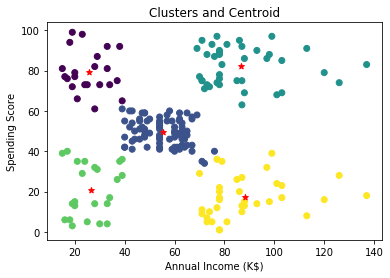

In [22]:
# Display the five clusters and the centroid
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c = kmeans.labels_)
plt.scatter(center[:, 0], center[:, 1], c = 'red', marker = '*')
plt.xlabel( 'Annual Income (K$)')
plt.ylabel ('Spending Score')
plt.title ('Clusters and Centroid')
plt.show()

**Observations:**

There are five type of cluster which are:
* Cluster 0: medium sending score and medium annual income.
* Cluster 1: low spending score and high annual income.
* Cluster 2: low sending score and low annual income.
* Cluster 3: high sending score and low annual income.
* Cluster 4: high spending score and high annual income.

The heigher spending scores indecate better behaviors and spending natures. So, the business should focus on the customers who have heigh spending score. These customers are the customers of Cluster 3 and Cluster 4. 


### 3.3. Results Discussion

Now, I will explore the characteristics of each clusters.

In [23]:
# Mearge the two dataframes based on the indexes numbers
new_df = df.merge(X_cls['Cluster'], left_index = True, right_index = True, how = 'inner')
new_df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [24]:
# Creating a datframe for Cluster 0. 
# Cluster 0: medium sending score and medium annual income.
df_c0 = new_df[new_df['Cluster'] == 0]
df_c0.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0


In [25]:
# Creating a datframe for Cluster 1. 
# Cluster 1: low spending score and high annual income.
df_c1 = new_df[new_df['Cluster'] == 1]
df_c1.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
43,44,Female,31,39,61,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1


In [26]:
# Creating a datframe for Cluster 2. 
# Cluster 2: low sending score and low annual income.
df_c2 = new_df[new_df['Cluster'] == 2]
df_c2.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2


In [27]:
# Creating a datframe for Cluster 3. 
# Cluster 3: high sending score and low annual income.
df_c3 = new_df[new_df['Cluster'] == 3]
df_c3.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,Male,19,15,39,3
2,3,Female,20,16,6,3
4,5,Female,31,17,40,3
6,7,Female,35,18,6,3
8,9,Male,64,19,3,3


In [28]:
# Creating a datframe for Cluster 4. 
# Cluster 4: high spending score and high annual income.
df_c4 = new_df[new_df['Cluster'] == 4]
df_c4.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
124,125,Female,23,70,29,4
128,129,Male,59,71,11,4
130,131,Male,47,71,9,4
134,135,Male,20,73,5,4
136,137,Female,44,73,7,4


In [29]:
# Creating a datframe for very heigh spending score, Spending Score > 60
df_high_sp = new_df[new_df['Spending_Score'] > 60]
df_high_sp.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0


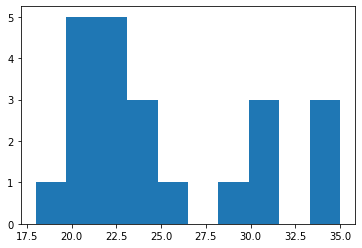

In [30]:
# Dispaly the distribution of Age in the Cluster 0
plt.hist(df_c0['Age'])
plt.show()

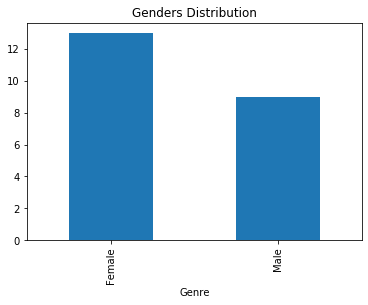

In [31]:
# Display the number of male and female in the Cluster 0
gender_df_c0 = df_c0.groupby(['Genre']).count()['CustomerID']
gender_df_c0.plot(kind='bar', title ='Genders Distribution');

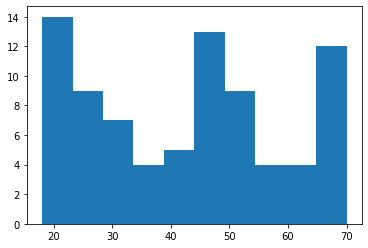

In [32]:
# Dispaly the distribution of Age in the Cluster 1
plt.hist(df_c1['Age'])
plt.show()

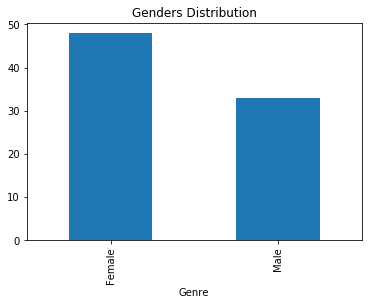

In [33]:
# Display the number of male and female in the Cluster 1
gender_df_c1 = df_c1.groupby(['Genre']).count()['CustomerID']
gender_df_c1.plot(kind='bar', title ='Genders Distribution');

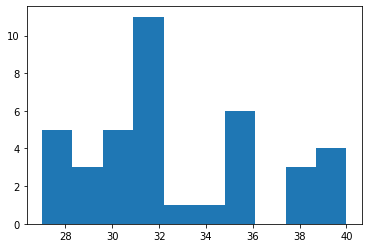

In [34]:
# Dispaly the distribution of Age in the Cluster 2
plt.hist(df_c2['Age'])
plt.show()

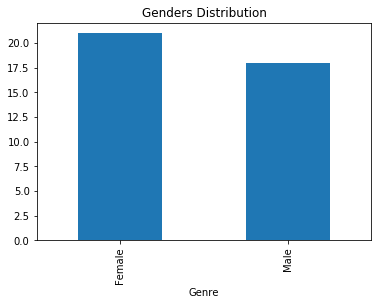

In [35]:
# Display the number of male and female in the Cluster 2
gender_df_c2 = df_c2.groupby(['Genre']).count()['CustomerID']
gender_df_c2.plot(kind='bar', title ='Genders Distribution');

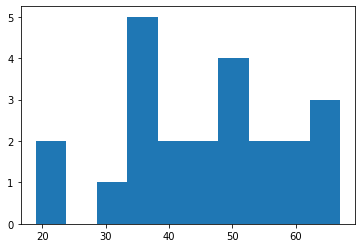

In [36]:
# Dispaly the distribution of Age in the Cluster 3
plt.hist(df_c3['Age'])
plt.show()

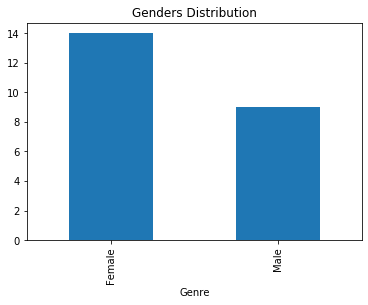

In [37]:
# Display the number of male and female in the Cluster 3
gender_df_c3 = df_c3.groupby(['Genre']).count()['CustomerID']
gender_df_c3.plot(kind='bar', title ='Genders Distribution');

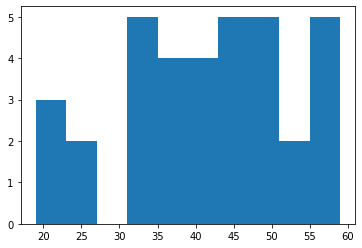

In [38]:
# Dispaly the distribution of Age in the Cluster 4
plt.hist(df_c4['Age'])
plt.show()

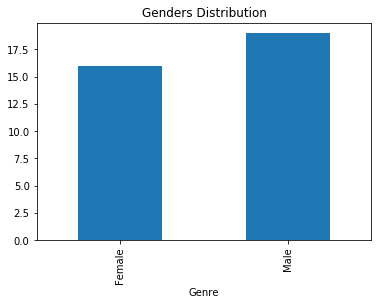

In [39]:
# Display the number of male and female in the Cluster 4
gender_df_c4 = df_c4.groupby(['Genre']).count()['CustomerID']
gender_df_c4.plot(kind='bar', title ='Genders Distribution');

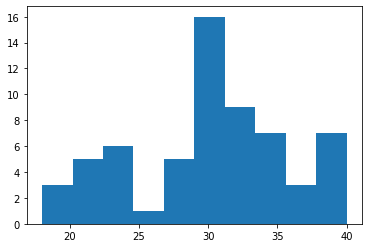

In [40]:
# Dispaly the distribution of Age of the customers with very heigh spending score
plt.hist(df_high_sp['Age'])
plt.show()

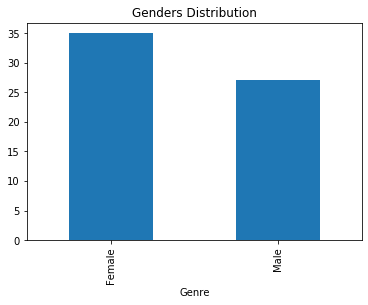

In [41]:
# Display the number of male and female of the customers with very heigh spending score
gender_df_high_sp = df_high_sp.groupby(['Genre']).count()['CustomerID']
gender_df_high_sp.plot(kind='bar', title ='Genders Distribution');

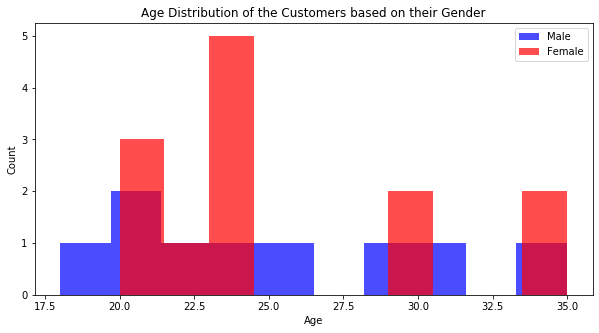

In [42]:
# Dispaly the distribution of Age based on the gender in Cluster 0
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(df_c0[df_c0['Genre'] =='Male']['Age'], color = 'blue', alpha = 0.7, label = 'Male')
ax.hist(df_c0[df_c0['Genre'] =='Female']['Age'], color ='red', alpha = 0.7, label = 'Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of the Customers based on their Gender')
plt.legend()
plt.show()

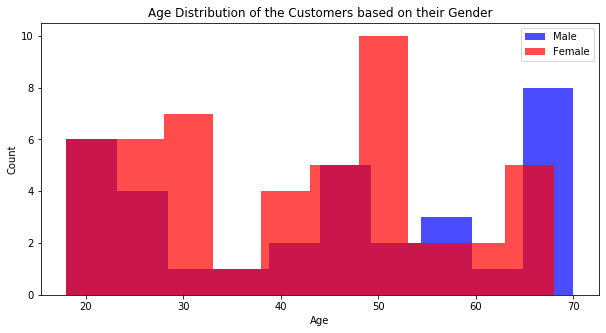

In [43]:
# Dispaly the distribution of Age based on the gender in Cluster 1
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(df_c1[df_c1['Genre'] =='Male']['Age'], color = 'blue', alpha = 0.7, label = 'Male')
ax.hist(df_c1[df_c1['Genre'] =='Female']['Age'], color ='red', alpha = 0.7, label = 'Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of the Customers based on their Gender')
plt.legend()
plt.show()

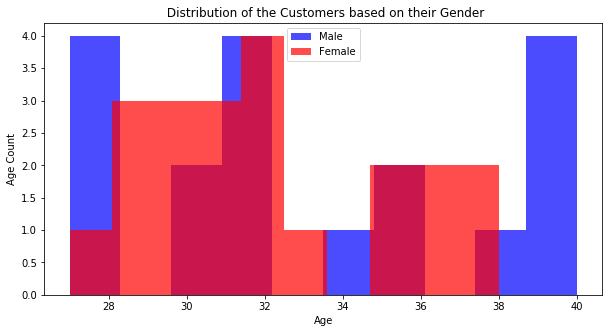

In [44]:
# Dispaly the distribution of Age based on the gender in Cluster 2
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(df_c2[df_c2['Genre'] =='Male']['Age'], color = 'blue', alpha = 0.7, label = 'Male')
ax.hist(df_c2[df_c2['Genre'] =='Female']['Age'], color ='red', alpha = 0.7, label = 'Female')
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.title(' Distribution of the Customers based on their Gender')
plt.legend()
plt.show()

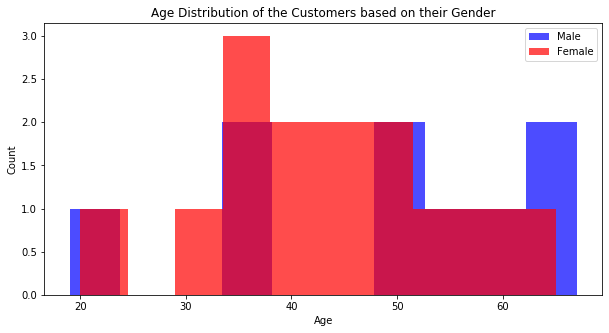

In [45]:
# Dispaly the distribution of Age based on the gender in Cluster 3
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(df_c3[df_c3['Genre'] =='Male']['Age'], color = 'blue', alpha = 0.7, label = 'Male')
ax.hist(df_c3[df_c3['Genre'] =='Female']['Age'], color ='red', alpha = 0.7, label = 'Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of the Customers based on their Gender')
plt.legend()
plt.show()

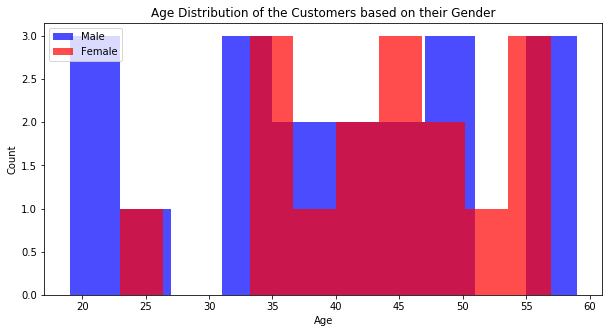

In [46]:
# Dispaly the distribution of Age based on the gender in Cluster 4
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(df_c4[df_c4['Genre'] =='Male']['Age'], color = 'blue', alpha = 0.7, label = 'Male')
ax.hist(df_c4[df_c4['Genre'] =='Female']['Age'], color ='red', alpha = 0.7, label = 'Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of the Customers based on their Gender')
plt.legend()
plt.show()

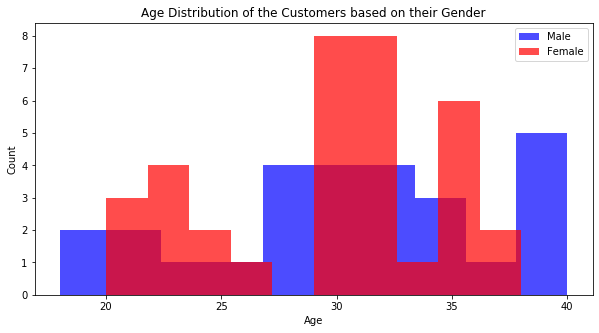

In [47]:
# Dispaly the distribution of Age based on the gender of the customers with very heigh spending score
figure, ax = plt.subplots(figsize = (10, 5))
ax.hist(df_high_sp[df_high_sp['Genre'] =='Male']['Age'], color = 'blue', alpha = 0.7, label = 'Male')
ax.hist(df_high_sp[df_high_sp['Genre'] =='Female']['Age'], color ='red', alpha = 0.7, label = 'Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of the Customers based on their Gender')
plt.legend()
plt.show()

**Observations:**

From the above charts, we can see that:
* Most of the customers in cluster 1 and cluster 2 are older than 35 years old.
* Most of the customers in cluster 3 and cluster 4 are female who are between 20 and 30 years old.


## 4. Summary

Customers data clustering help us to understand the customers’ characteristics. Here are some suggestion for each cluster:

* The customers in clusters 0, who have medium annual incomes and medium spending scores, can be attractive by marketing campaigns.

* The customers in clusters 1, who have low annual incomes and low spending scores, are usually older than 35 years. So, we need to the find a way to attract old customers for example special offers for the products that they usually buy it, and investigate the causes of the low spending scores.

* The customers in clusters 2, who have high annual incomes and low spending scores, are usually males or old females. So, we need to the find a way to attract them customers for example special offers for the products that they usually buy it, and investigate the causes of the low spending scores.

* The customers in clusters 3, who have low annual incomes and high spending scores, are special customer because their incomes are low and spending scores are high. We should to keep these customers by designing a loyalty programs which offers discounts to the members.

* The customers in clusters 4, who have high annual incomes and high spending scores, are the most valuable customers. We should keep these customers by appropriate pricing or special offers. 

From the clustering we found that, the customers in cluster 3 and cluster 4 are usually female who are between the ages of 20 and 30 years old. So, to obtain new customers, we can fouces on female who are between 20 and 30 in the advertising campaign. 